In [1]:
# Yasir Hassan
# Decision Tree and Random Forest with Parameter Optimization
# To classify the 5 classes of SingleCell-Seq 
# using the database Data_Glioblastoma5Patients_SC

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [94]:
# read the dataset\n",
readdata = pd.read_csv(r"C:\Users\NeverGiveUp\Desktop\Writing_File\Data_Glioblastoma5Patients_SC.csv")
df = pd.DataFrame(readdata)  

In [95]:
correct_Pattern_labels = df['Classes'].values

In [96]:
df.describe()

,A2M,AAAS,AAK1,AAMP,AARS,AARSD1,AASDH,AASDHPPT,AASS,AATF,...,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZXDC,ZYG11B,ZYX,ZZZ3,Classes
count,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,...,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,430.000000
mean,-5.116304e-11,9.069751e-11,1.627911e-11,-7.674423e-11,-8.139528e-11,-1.302326e-10,-2.255814e-10,-2.325854e-12,5.813938e-11,-1.511630e-10,...,-1.906975e-10,-3.953480e-11,-4.418617e-11,-1.651161e-10,1.906977e-10,-1.348837e-10,3.255816e-11,-2.023256e-10,-1.604652e-10,2.727907
std,4.907659e+00,3.641663e+00,2.474651e+00,3.563029e+00,3.909578e+00,3.317166e+00,2.883981e+00,3.759008e+00,3.236368e+00,3.461157e+00,...,2.730348e+00,2.946168e+00,2.702606e+00,2.836726e+00,2.788284e+00,2.859633e+00,2.811249e+00,3.001418e+00,3.052755e+00,1.438049
min,-3.801470e+00,-3.889900e+00,-3.985616e+00,-5.820241e+00,-6.041792e+00,-3.699171e+00,-2.473517e+00,-4.354127e+00,-6.493931e+00,-2.570976e+00,...,-1.821098e+00,-3.118284e+00,-1.538324e+00,-1.550699e+00,-1.558581e+00,-3.068620e+00,-3.421540e+00,-2.509017e+00,-2.149696e+00,1.000000
25%,-3.801470e+00,-3.889900e+00,-1.871573e+00,-3.807913e+00,-4.560471e+00,-3.699171e+00,-2.473517e+00,-4.354127e+00,-1.967954e+00,-2.570976e+00,...,-1.821098e+00,-3.118284e+00,-1.538324e+00,-1.550699e+00,-1.558581e+00,-3.068620e+00,-2.423300e+00,-2.509017e+00,-2.149696e+00,1.000000
50%,-3.801470e+00,4.099148e-01,-3.150282e-01,1.746972e+00,1.776033e+00,1.097698e-01,-2.473517e+00,1.255356e+00,1.192040e+00,-2.570976e+00,...,-1.821098e+00,-8.136609e-01,-1.538324e+00,-1.550699e+00,-1.558581e+00,-8.339072e-01,-4.421617e-01,-2.509017e+00,-2.149696e+00,3.000000
75%,4.943281e+00,3.711243e+00,2.002047e+00,2.686033e+00,3.116038e+00,3.238343e+00,2.622538e+00,3.553135e+00,2.261182e+00,3.911515e+00,...,2.038805e+00,2.848862e+00,8.320662e-01,-1.687454e-01,3.335339e-01,2.459752e+00,2.514619e+00,2.939355e+00,2.228821e+00,4.000000
max,1.170195e+01,5.840230e+00,5.389576e+00,4.520579e+00,6.366184e+00,6.012985e+00,6.798128e+00,5.729251e+00,4.324112e+00,6.992394e+00,...,7.931653e+00,6.105923e+00,8.186486e+00,8.073628e+00,7.998381e+00,5.950488e+00,6.703674e+00,6.918941e+00,8.064823e+00,5.000000


In [97]:
# Map the labels to the ordinal numbers
df['Classes']=df['Classes'].replace({1:"CT1", 2:"CT2", 3:"CT3", 4:"CT4", 5:"CT5"})

In [98]:
# Obtain the class distribution
df['Classes'].value_counts()

CT1    118
CT2     94
CT3     75
CT4     73
CT5     70
Name: Classes, dtype: int64

In [99]:
# Scale the features using StandardScaler class.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [100]:
# Train, test split
from sklearn.model_selection import train_test_split
X = df.drop(['Classes'],axis=1)
y = df['Classes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [101]:
# obtain class labels for future use
classes = y.value_counts().index.tolist()

In [102]:
# instantiate the object for the classifier
tree = DecisionTreeClassifier(random_state=0)

In [103]:
# fit the classifier with training data
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [104]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.860


In [105]:
# The training set is 100% because the leaves are pure.
# The tree was grown deep enough that it could perfectly memorize 
# all the labels on the training data. 
# The test set accuracy 86% accuracy.

In [106]:
# Now a pply pre-pruning to the tree, which will stop developing
# the tree before it perfectly fits to the training data. 
# This will stop building the tree after a certain depth
# has been reached, which is 4, level
# And then fit the tree clf with training data
tree = DecisionTreeClassifier(max_depth= 4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [107]:
# Display the score for both training and then testing data
# after applying pre-pruning to the tree, where max_depth = 4
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.965
Accuracy on test set: 0.860


In [108]:
# perfrom prediction on X test data
y_pred = tree.predict(X_test)

In [109]:
# get the confusion accuracy by comparing the prediction result to the test labels, y_test
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[23  0  0  0  0]
 [ 0 18  0  1  0]
 [ 0  1 13  0  1]
 [ 0  1  1 12  1]
 [ 0  3  1  2  8]]


In [110]:
# get the accuracy and print it
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8604651162790697


In [111]:
# So, the accuracy on test set has not changed yet.
# Therefore, I am going to use the GridSearch Classifier 
# for finding the best parameters.

In [112]:
# Elect  parameters for the grid_search to find the best params and the best model.
# Parameter Optimization, to Evaluate the Performance of 
# a single decision tree.
# I use GridsearchCV classifier for finding the best parameters
initial_param = {
    "criterion":["gini", "entropy"],
    "max_depth":[1,2,3,4,5,6,7, None]
}

In [113]:
# import and use GridSearchCV for parameter optimzation
from sklearn.model_selection import GridSearchCV 
grid = GridSearchCV(estimator = tree, param_grid = initial_param, cv = 5, n_jobs = -1)

In [114]:
# fit the grid_search with the training data
grid_search = grid_search.fit(X_train, y_train)

In [115]:
# get the accuracy after grid search
accuracy = grid_search.best_score_
print(accuracy)

0.8950980392156863


In [116]:
# I can see from the above result:
# the accuracy on test set increased
# from .86 to .90

In [117]:
# get best parameter from the grid_search
print(grid_search.best_params_)

{'criterion': 'gini', 'splitter': 'best'}


In [118]:
# using the found best parameters, I instantiate 
# the Decision Tree object again
# tree = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', random_state = 0)
tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 4, random_state=0)

In [119]:
# fit the classifier with the training set
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [120]:
y_pred = tree.predict(X_test)

In [121]:
# print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[23  0  0  0  0]
 [ 0 18  0  1  0]
 [ 0  1 13  0  1]
 [ 0  1  1 12  1]
 [ 0  3  1  2  8]]


In [122]:
# print the accuracy after parameter optimization
accuracy

0.8950980392156863

In [123]:
# Applying pre-pruning to the tree will stop developing
# the tree before fiting to the training data. 
# So, stop building the tree after a certain depth has been reached. 
# Here I set max_depth =4, meaning only
# four consecutive questions can be asked. 
# Limiting the depth of the tree decreases overfitting. 
# This lead to a lower accuracy on the training set.

In [124]:
# Visualize the tree using the export_graphviz function from the tree module
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["Class_1", "Class2", "Class_3", "Class_4","Class_5"],
                impurity=False, filled=True)

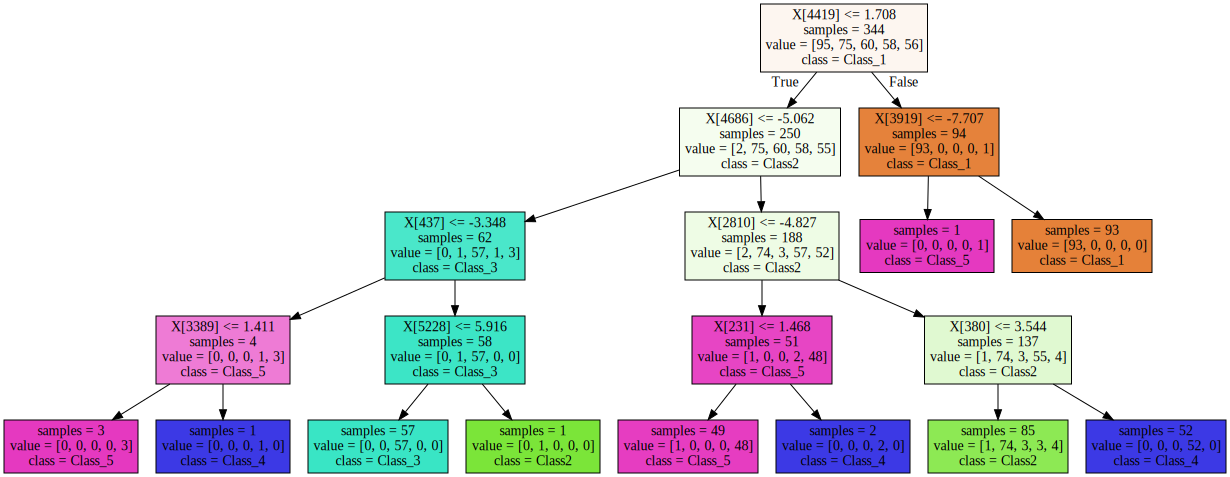

In [125]:
# Visualization of the decision tree built:
# Read the file and visualize it, using the graphviz module
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [126]:
# Now, building a random forest consisting of 10 trees on the data
# The choice of 10 trees is Arbitrary.
forest = RandomForestClassifier(n_estimators= 10, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [127]:
# The trees that are built as part of the random forest are stored in the estimator_ attribute. 
# Visualize the decision boundaries learned by each tree, together with
# their aggregate prediction as made by the forest

In [128]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.919


In [141]:
# from using the RandomForestClassifier above,
# I can see that the accuracy of the test set
# greatly improve from 0.86 in the decision tree
# to 0.919 

In [142]:
# The random forest gave an accuracy of 91%,
# without tuning any parameters. I could adjust the max_features setting, 
# or apply pre-pruning as for the single decision tree.
# Often the default parameters of the random forest already work quite well.

In [143]:
# Random forests for regression and classification are
# among the most widely used machine learning methods. They are
# very powerful, often work well without heavy tuning of the parameters, 
# and don’t require scaling of the data.

In [144]:
# Parameter optimization, to evaluate the performance of 
# a random forest.
# User GridsearchCV classifier for finding the best parameters
initial_param = {
    "n_estimators" : [1,10,20, 30, 50, 100, None],
    "criterion":["gini"],
}
grid = GridSearchCV(forest, param_grid = initial_param, cv = 5, n_jobs = -1)

In [145]:
# fit the grid with training data set.
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=2,
                                   

In [146]:
# Finding GridSearch best estimator for random forest
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [147]:
# Grid Search best score for the random forest
grid.best_score_

0.9681159420289855

In [154]:
# As I can see, after using GridSearchCV,
# the randomForestClassifier's score greatly
# improved from 0.91 to .96 (this is the best_score though)

In [155]:
# Grid Search best parameters for random forest
grid.best_params_

{'criterion': 'gini', 'n_estimators': 100}

In [156]:
# buidling a random forest consisting of 100 trees on the data
forest = RandomForestClassifier(criterion= 'gini', n_estimators= 100, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [157]:
# find the accuracy of the prediction of the forest test data.
y_pred = forest.predict(X_test)

In [158]:
# accuracy of the forest
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9651162790697675

In [160]:
# After using gridSearchCV, the RandomForestClassifier
# gave 0.96 accuracy of the test set.